# NYC 311 Pulse: Unlocking the City's Service Request Insights

### Project Overview Summary

This project focuses on cleaning and analyzing a dataset containing 311 service requests from New York City (NYC). The dataset includes various types of complaints, such as noise, illegal parking, blocked driveways, and more, recorded over a period of time. The goal of the project is to clean the data, handle missing and duplicate values, standardize the data format, and perform exploratory data analysis (EDA) to uncover trends and insights. The cleaned data is then saved for further analysis or reporting.

### Data Overview

The dataset contains 300,698 entries with 53 columns, including details such as:

1. Unique Key: A unique identifier for each complaint.
2. Created Date and Closed Date: Timestamps for when the complaint was created and closed.
3. Agency and Agency Name: The agency responsible for handling the complaint.
4. Complaint Type: The type of complaint (e.g., noise, illegal parking, blocked driveway).
5. Borough: The borough where the complaint was filed.
6. Location: Geographic coordinates of the complaint.
7. Response Time: The time taken to resolve the complaint.

### Step 1: Importing necessary libraries.

pandas for data manipulation
matplotlib.pyplot and seaborn for creating visualizations

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Step 2: Loading the dataset into a DataFrame

The dataset is loaded into a pandas DataFrame from a CSV file using low_memory=False to avoid issues with mixed data types in large datasets


In [107]:
data = pd.read_csv("Data Cleaning/NYC311data.csv", low_memory=False)

### Step 3: Inspecting the first few rows of the dataset to get an overview

The first few rows of the dataset were inspected to get an overview. <br> The info() method was used to check the data types and non-null counts of each column.

In [109]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

### Step 4: Handling Missing and Duplicate Values

#### Checking for missing values

Missing values were identified and handled by filling certain columns (e.g., Complaint Type and Borough) with default values like "Unknown" and "Other".

In [116]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Closed Date                         2164
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Due Date                               3
Resolution Action Updated Date      2187
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Loc

#### Filling missing 'Complaint Type' with "Unknown" and 'Borough' with "Other"

In [119]:
data["Complaint Type"] = data["Complaint Type"].fillna("Unknown")
data["Borough"] = data["Borough"].fillna("Other")

#### Dropping rows & columns

Dropping columns that have no values at all (empty columns) <br> Dropping duplicate rows to ensure each entry is unique to ensure data integrity.

In [122]:
columns_to_remove = [

    'Landmark', 'School Region', 'School Code', 'School Phone Number', 'School Address', 
    'School City', 'School State', 'School Zip', 'School Not Found', 'Vehicle Type', 
    'School or Citywide Complaint', 'Taxi Company Borough', 'Taxi Pick Up Location', 
    'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Ferry Direction', 
    'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Terminal Name', 'School Name', 
    'Park Facility Name', 'School Number'
]

data = data.drop(columns=columns_to_remove, errors='ignore')

data.dropna(axis=1, how="all", inplace=True)

data.drop_duplicates(inplace=True)

data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


####  Standardize Text Columns (Converting to lowercase)

Converting the 'Complaint Type' and 'Borough' columns to lowercase for consistency

####  Converting Date-Time Columns to Correct Format

The Created Date and Closed Date columns were converted to datetime format. <br> The response time for each complaint was calculated in hours.

In [126]:
data['Created Date'] = pd.to_datetime(data['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

data['Response Time (hrs)'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() / 3600

####  Handle Numerical Columns (ZIP Code)
The Incident Zip column was standardized to the first 5 digits of the ZIP code.

In [130]:
data["Incident Zip"] = data["Incident Zip"].astype(str).str[:5] 
data["Incident Zip"] = data["Incident Zip"].apply(lambda x: x if x.isnumeric() else "Unknown")

### Step 5: Data Manipulation

#### Extracting useful time ana date-related features for analysis

New features such as Year, Month, Day, Hour, and Day of Week were extracted from the Created Date column.

In [133]:
data["Year-Month"] = data["Created Date"].dt.to_period("M") 
data["Year"] = data["Created Date"].dt.year
data["Month"] = data["Created Date"].dt.month
data["Day"] = data["Created Date"].dt.day
data["Hour"] = data["Created Date"].dt.hour
data["Day of Week"] = data["Created Date"].dt.day_name()

#### Grouping complaints into broader categories
Complaints were grouped into broader categories (e.g., "Noise", "Parking") for easier analysis.

In [30]:
complaint_mapping = {
    'Noise - Street/Sidewalk': 'Noise', 
    'Noise - Residential': 'Noise',
    'Illegal Parking': 'Parking', 
    'Blocked Driveway': 'Parking'
}
data['Complaint Group'] = data['Complaint Type'].map(complaint_mapping).fillna('Other')


### Step 6: Exploratory Data Analysis (Trend Analysis and Visualizations)

Setting the seaborn style for the plots to make them look more appealingsns.set(style="whitegrid")

In [34]:
sns.set(style="whitegrid")

#### 1. Complaints by Borough (Bar Plot)
A bar plot was created to show the number of complaints per borough.

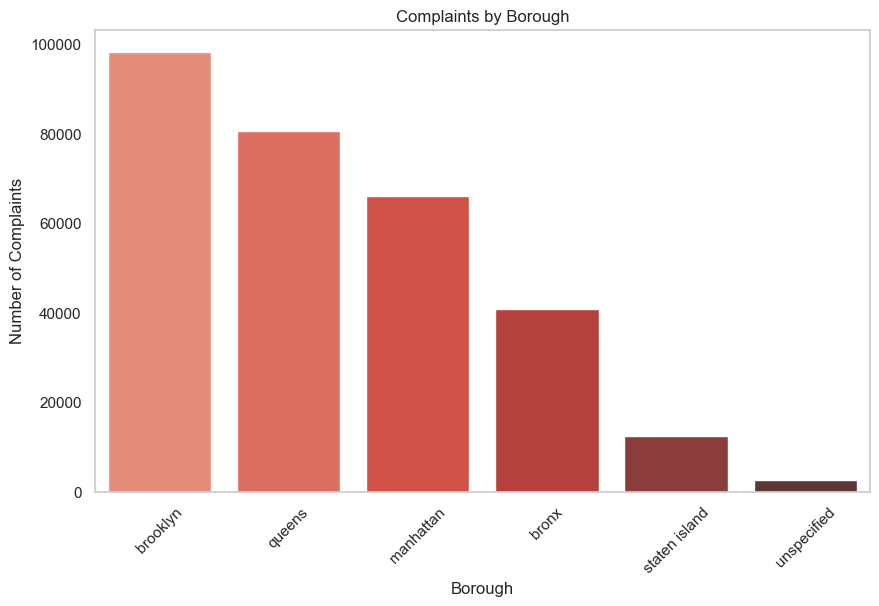

In [41]:
plt.figure(figsize=(10, 6))
complaints_by_borough = data["Borough"].value_counts()
sns.barplot(x=complaints_by_borough.index, y=complaints_by_borough.values, hue=complaints_by_borough.index, palette="Reds_d")
plt.title("Complaints by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45) 
plt.grid(False) 
plt.show()

#### 2. Complaints by Category (Top 10 Most Common Complaints)
A bar plot was created to visualize the most frequent complaint types.

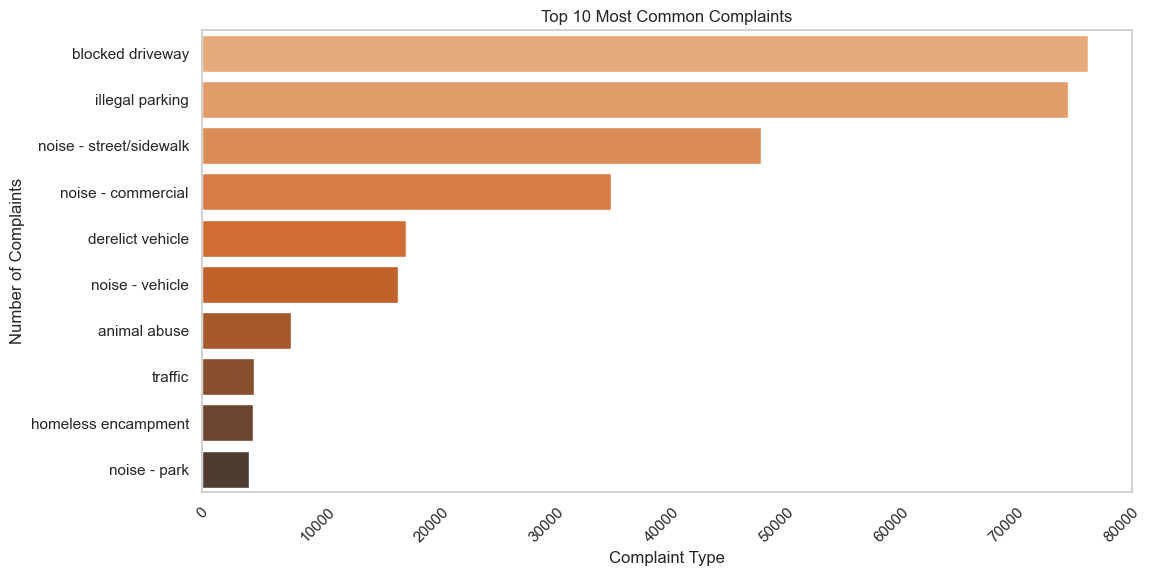

In [44]:
plt.figure(figsize=(12, 6))
complaints_by_category = data["Complaint Type"].value_counts().head(10)  
sns.barplot(x=complaints_by_category.values, y=complaints_by_category.index, hue= complaints_by_category.index, palette="Oranges_d")
plt.title("Top 10 Most Common Complaints")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.grid(False) 
plt.show()

#### 3. Trends Over Time 

#### Monthly Trend of Complaints

Grouped data by Year and Month to show how complaints change over time

<Figure size 1200x600 with 0 Axes>

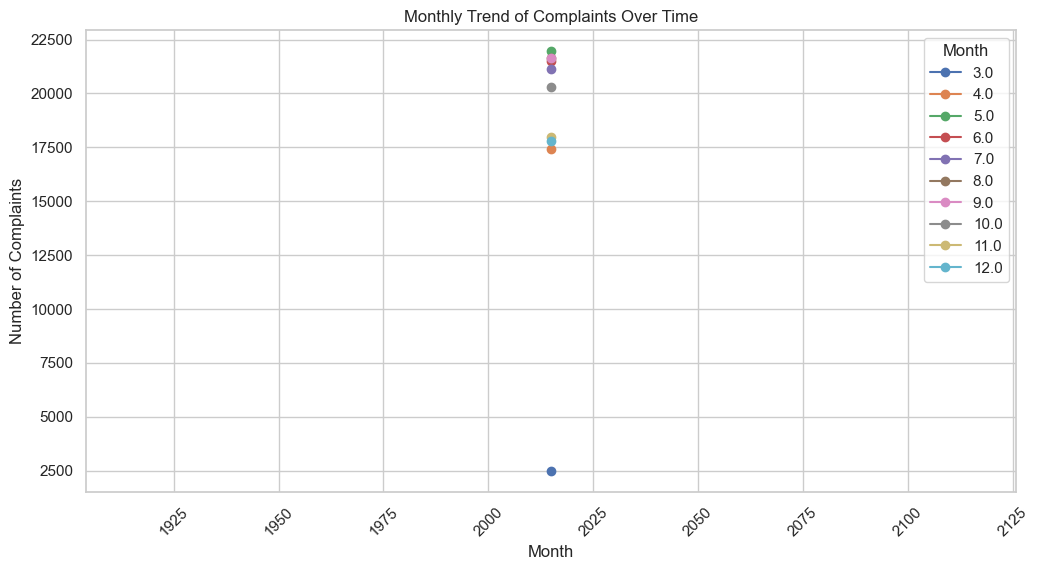

In [48]:
plt.figure(figsize=(12, 6))
monthly_trends = data.groupby(["Year", "Month"]).size().unstack(fill_value=0)
monthly_trends.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Monthly Trend of Complaints Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()

#### Complaints by Hour of Day (Heatmap)

Create a heatmap to show the frequency of complaints by hour and day of the week

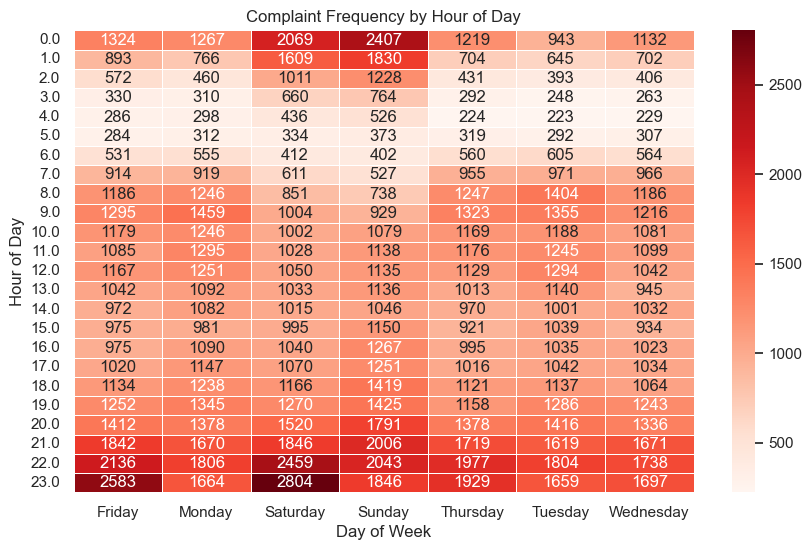

In [51]:
plt.figure(figsize=(10, 6))
hourly_trends = data.groupby(["Hour", "Day of Week"]).size().unstack(fill_value=0)
sns.heatmap(hourly_trends, cmap="Reds", annot=True, fmt="d", linewidths=0.5)
plt.title("Complaint Frequency by Hour of Day")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()

#### Complaints by Day of the Week (Bar Plot)

A bar plot was created to show the distribution of complaints across different days of the week.

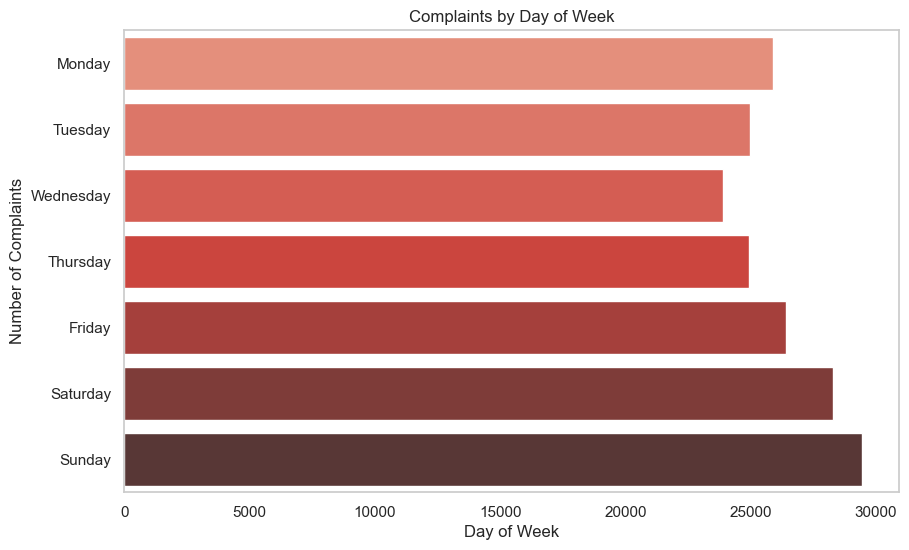

In [54]:
plt.figure(figsize=(10, 6))
complaints_by_day_of_week = data["Day of Week"].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.barplot(x=complaints_by_day_of_week.values, y=complaints_by_day_of_week.index, hue= complaints_by_day_of_week.index, palette="Reds_d")
plt.title("Complaints by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Complaints")
plt.grid(False) 
plt.show()

#### 4. Most Frequent Complaint Types

In [57]:
complaint_types = data["Complaint Type"].value_counts()
print("Top 10 Most Frequent Complaint Types:")
print(complaint_types.head(10))  

Top 10 Most Frequent Complaint Types:
Complaint Type
blocked driveway           77044
illegal parking            75361
noise - street/sidewalk    48612
noise - commercial         35577
derelict vehicle           17718
noise - vehicle            17083
animal abuse                7778
traffic                     4498
homeless encampment         4416
noise - park                4042
Name: count, dtype: int64


#### 5. Most Common Complaints by Location (Borough)

In [60]:
complaints_by_borough = data.groupby("Borough")["Complaint Type"].value_counts()
print("Most Common Complaints by Borough:")
print(complaints_by_borough)

Most Common Complaints by Borough:
Borough      Complaint Type          
bronx        blocked driveway            12755
             noise - street/sidewalk      8891
             illegal parking              7859
             noise - vehicle              3396
             noise - commercial           2434
                                         ...  
unspecified  noise - house of worship        2
             panhandling                     2
             animal in a park                1
             posting advertisement           1
             traffic                         1
Name: count, Length: 119, dtype: int64


#### 6.  Complaints by Category (if relevant column like 'Agency' or 'Descriptor' exists)

In [63]:
if 'Agency' in data.columns:
    complaints_by_agency = data.groupby("Agency")["Complaint Type"].value_counts()
    print("Most Common Complaints by Agency:")
    print(complaints_by_agency)

if 'Descriptor' in data.columns:
    complaints_by_descriptor = data.groupby("Descriptor")["Complaint Type"].value_counts()
    print("Most Common Complaints by Descriptor:")
    print(complaints_by_descriptor)

Most Common Complaints by Agency:
Agency  Complaint Type           
nypd    blocked driveway             77044
        illegal parking              75361
        noise - street/sidewalk      48612
        noise - commercial           35577
        derelict vehicle             17718
        noise - vehicle              17083
        animal abuse                  7778
        traffic                       4498
        homeless encampment           4416
        noise - park                  4042
        vending                       3802
        drinking                      1280
        noise - house of worship       931
        posting advertisement          650
        urinating in public            592
        bike/roller/skate chronic      427
        panhandling                    307
        disorderly youth               286
        illegal fireworks              168
        graffiti                       113
        agency issues                    6
        squeegee             

#### 7. Distribution of Response Time for Complaints

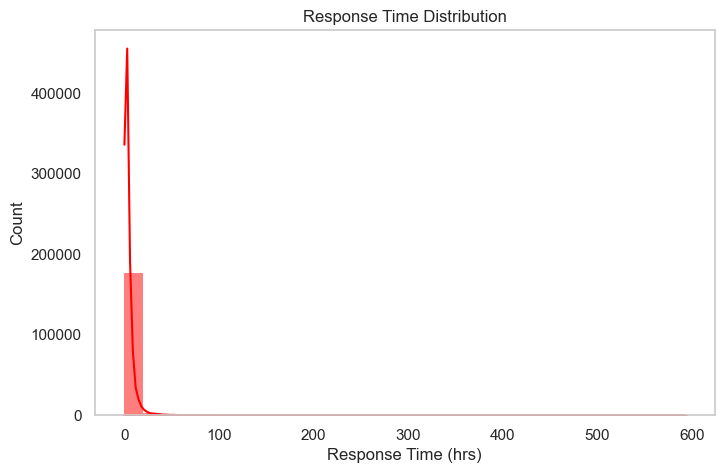

In [66]:
# Create the plot
plt.figure(figsize=(8, 5))
sns.histplot(data['Response Time (hrs)'], bins=30, kde=True, color='Red', linewidth=0)  # Histogram with KDE

# Customize the KDE shading
sns.kdeplot(data['Response Time (hrs)'], fill= True, color='Red', alpha=0.5)  # KDE with red shading

# Title and grid options
plt.title("Response Time Distribution")
plt.grid(False)

# Show the plot
plt.show()


### Saving the Cleaned Data

In [69]:
data.to_csv("cleaned_311_data_with_trends.csv", index=False)

print("Data cleaning, trends, and visualizations complete. Data saved to 'cleaned_311_data_with_trends.csv'.")

Data cleaning, trends, and visualizations complete. Data saved to 'cleaned_311_data_with_trends.csv'.


### Trends and Insights

##### Complaints by Borough:
The borough with the highest number of complaints was Brooklyn, followed by Manhattan and Queens.

##### Top 10 Most Common Complaints:
The most frequent complaints were Blocked Driveway, Illegal Parking, and Noise - Street/Sidewalk.

##### Trends Over Time:
Complaints peaked during certain months, possibly due to seasonal factors. <br> The heatmap showed that complaints were most frequent during the evening hours (6 PM to 10 PM) and on weekends.

##### Complaints by Day of the Week:
Complaints were highest on Mondays and Tuesdays, possibly due to the start of the workweek.

##### Response Time Distribution:
Most complaints were resolved within 24 hours, but some took significantly longer, indicating potential inefficiencies in certain cases.


### Recommendations

##### Resource Allocation:
Allocate more resources to boroughs with the highest number of complaints, such as Brooklyn and Manhattan.

##### Targeted Interventions:
Focus on the most common complaints (e.g., blocked driveways, illegal parking) by increasing enforcement or public awareness campaigns.

##### Improving Response Times:
Investigate the causes of delayed response times and implement strategies to reduce them, especially for complaints that take longer than 24 hours to resolve.

##### Seasonal Adjustments:
Prepare for seasonal spikes in complaints by increasing staff or resources during peak months.

##### Public Awareness:
Educate the public on how to avoid common complaints, such as noise and illegal parking, to reduce the overall number of service requests.

### Conclusions

This project successfully cleaned and analyzed a large dataset of NYC 311 service requests, uncovering valuable insights into the types of complaints, their distribution across boroughs, and trends over time. The analysis revealed that certain boroughs and complaint types require more attention, and response times could be improved in some cases. The cleaned dataset and visualizations provide a solid foundation for further analysis and decision-making by city officials and agencies.

By addressing the recommendations, NYC can improve its service response efficiency and better meet the needs of its residents.